In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
df = pd.read_csv('data.csv')

In [327]:
df.head()

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,131161,4937758,2021.0,2021,1940.0,PRIVATE,11,University-Rosedale,424 YONGE ST,10,...,4.0,NaN,4.0,NaN,NaN,S1145,43.660499,-79.383977,314228.403,4835355.504
1,131162,4915028,2021.0,2021,2021.0,PRIVATE,11,University-Rosedale,484 SPADINA AVE,16,...,5.0,5.0,5.0,5.0,NaN,S1138,43.658294,-79.400753,312789.392,4835153.945
2,131163,4154086,2017.0,2021,1986.0,TCHC,14,Toronto-Danforth,266 DONLANDS AVE,8,...,4.0,4.0,4.0,4.0,NaN,S1422,43.689656,-79.341908,317529.069,4838645.480
3,131164,4155609,2017.0,2021,1970.0,TCHC,14,Toronto-Danforth,2 PHIN AVE,3,...,4.0,NaN,3.0,NaN,NaN,S1431,43.678805,-79.335872,318018.089,4837440.899
4,131165,4155471,2017.0,2021,1992.0,TCHC,3,Etobicoke-Lakeshore,98 CAVELL AVE,6,...,3.0,NaN,4.0,NaN,NaN,W0336,43.616184,-79.495901,305111.300,4830450.134


In [328]:
df.columns

Index(['_id', 'RSN', 'YEAR_REGISTERED', 'YEAR_EVALUATED', 'YEAR_BUILT',
       'PROPERTY_TYPE', 'WARD', 'WARDNAME', 'SITE_ADDRESS',
       'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'EVALUATION_COMPLETED_ON',
       'SCORE', 'RESULTS_OF_SCORE', 'NO_OF_AREAS_EVALUATED', 'ENTRANCE_LOBBY',
       'ENTRANCE_DOORS_WINDOWS', 'SECURITY', 'STAIRWELLS', 'LAUNDRY_ROOMS',
       'INTERNAL_GUARDS_HANDRAILS', 'GARBAGE_CHUTE_ROOMS',
       'GARBAGE_BIN_STORAGE_AREA', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS',
       'INTERIOR_WALL_CEILING_FLOOR', 'INTERIOR_LIGHTING_LEVELS', 'GRAFFITI',
       'EXTERIOR_CLADDING', 'EXTERIOR_GROUNDS', 'EXTERIOR_WALKWAYS',
       'BALCONY_GUARDS', 'WATER_PEN_EXT_BLDG_ELEMENTS', 'PARKING_AREA',
       'OTHER_FACILITIES', 'GRID', 'LATITUDE', 'LONGITUDE', 'X', 'Y'],
      dtype='object')

In [329]:
# discard columns that are not useful
df.drop(['_id', 
         'RSN', 
         'YEAR_REGISTERED', 
         'RESULTS_OF_SCORE', 
         'WARDNAME', 
         'SITE_ADDRESS', 
         'GRID', 
         'X', 
         'Y', ], axis = 1, inplace = True)

In [330]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR_EVALUATED,8744.0,2018.280078,1.275460,2017.000000,2017.000000,2018.000000,2019.000000,2021.000000
YEAR_BUILT,8705.0,1960.978518,18.978313,1805.000000,1955.000000,1961.000000,1970.000000,2021.000000
WARD,8744.0,10.822164,6.338090,1.000000,5.000000,11.000000,15.000000,25.000000
CONFIRMED_STOREYS,8744.0,7.548033,6.118897,0.000000,3.000000,4.000000,10.000000,51.000000
CONFIRMED_UNITS,8744.0,88.255947,112.652645,0.000000,24.000000,48.000000,118.000000,4111.000000
SCORE,8744.0,71.684812,10.054634,0.000000,64.000000,72.000000,79.000000,100.000000
NO_OF_AREAS_EVALUATED,8744.0,17.138381,1.671958,0.000000,16.000000,17.000000,18.000000,20.000000
ENTRANCE_LOBBY,8743.0,3.599908,0.747028,1.000000,3.000000,4.000000,4.000000,5.000000
ENTRANCE_DOORS_WINDOWS,8743.0,3.535400,0.716731,1.000000,3.000000,4.000000,4.000000,5.000000
SECURITY,8742.0,3.959620,0.868202,1.000000,3.000000,4.000000,5.000000,5.000000


In [331]:
len(df)

8744

In [332]:
df.isna().sum()

YEAR_EVALUATED                    0
YEAR_BUILT                       39
PROPERTY_TYPE                     0
WARD                              0
CONFIRMED_STOREYS                 0
CONFIRMED_UNITS                   0
EVALUATION_COMPLETED_ON           0
SCORE                             0
NO_OF_AREAS_EVALUATED             0
ENTRANCE_LOBBY                    1
ENTRANCE_DOORS_WINDOWS            1
SECURITY                          2
STAIRWELLS                        1
LAUNDRY_ROOMS                   500
INTERNAL_GUARDS_HANDRAILS         1
GARBAGE_CHUTE_ROOMS            4948
GARBAGE_BIN_STORAGE_AREA          4
ELEVATORS                      3630
STORAGE_AREAS_LOCKERS          5364
INTERIOR_WALL_CEILING_FLOOR       1
INTERIOR_LIGHTING_LEVELS          1
GRAFFITI                         16
EXTERIOR_CLADDING                 1
EXTERIOR_GROUNDS                 15
EXTERIOR_WALKWAYS                 6
BALCONY_GUARDS                 2830
WATER_PEN_EXT_BLDG_ELEMENTS       5
PARKING_AREA                

In [333]:
# discard columns that are too sparse
df.drop(['GARBAGE_CHUTE_ROOMS', 
         'ELEVATORS', 
         'STORAGE_AREAS_LOCKERS', 
         'BALCONY_GUARDS', 
         'OTHER_FACILITIES', ], axis = 1, inplace = True)

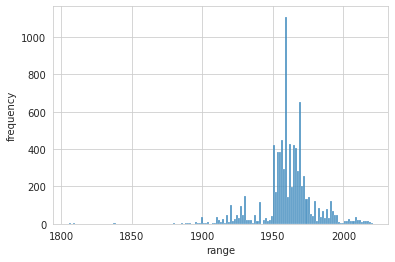

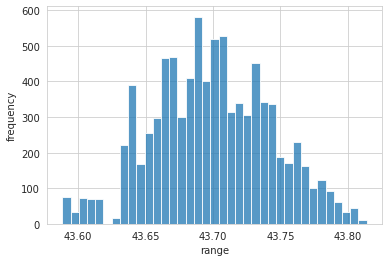

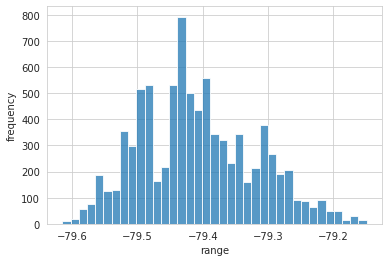

In [334]:
# let us check the distribution of columns that need imputing
# note we do not need to check columns we know are bounded from [1, 5]
columns_check = [
    'YEAR_BUILT',
    'LATITUDE',
    'LONGITUDE',
]

sns.set_style("whitegrid")

for column in columns_check:
    sns.histplot(df[column], 
                 # bins=range(int(min(df[column])), int(max(df[column])), 1), 
                 kde = False)
    plt.xlabel('range')
    plt.ylabel('frequency')
    plt.show()

In [335]:
# df rows just under 10,000
# possible problem columns has a reasonable distribution
# so we can impute with K-NN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
imputed_df = imputer.fit_transform(df[df.select_dtypes([np.number]).columns])
df[df.select_dtypes([np.number]).columns] = imputed_df

In [336]:
# encode categorical features

from sklearn.preprocessing import LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include = ['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [337]:
df.select_dtypes(include = ['category','object'])

,PROPERTY_TYPE,EVALUATION_COMPLETED_ON
0,PRIVATE,2021-06-22
1,PRIVATE,2021-06-22
2,TCHC,2021-05-14
3,TCHC,2021-05-14
4,TCHC,2021-05-12
...,...,...
8739,PRIVATE,2017-09-14
8740,PRIVATE,2017-09-14
8741,PRIVATE,2017-09-14
8742,PRIVATE,2017-09-14


In [338]:
df = dummyEncode(df)

In [339]:
# removing outliers with greater than 3 standard deviations
import scipy.stats as stats

z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
new_df = df[filtered_entries]

df = new_df

In [340]:
y = df['CONFIRMED_STOREYS']
X = df.drop(['CONFIRMED_STOREYS'], axis = 1, inplace = False)

In [341]:
# polynomial augmentation
from sklearn.preprocessing import PolynomialFeatures

# don't need intercept so include_bias is false
poly_transform = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
poly_X = poly_transform.fit_transform(X)

In [342]:
# split to train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3, random_state = 0)

In [343]:
# normalize X data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [344]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=0)
# model.fit(X_train, y_train)

In [345]:
# model.score(X_test, y_test)

In [302]:
# note: deeper trees reduce bias, more trees reduce variance

In [303]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 100, max_depth = None, random_state = 0)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [304]:
regr.score(X_test, y_test)

0.8616064739438101

In [305]:
# we find the interesting relation between the number of floors to the general condition of the building

In [306]:
# further evaluation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(regr, poly_X, y, 
                           scoring = 'neg_mean_absolute_error', 
                           cv = cv, 
                           n_jobs = -1, 
                           error_score = 'raise')

print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -1.033 (0.062)


In [307]:
# tune hyperparameters

In [346]:
# plot of all building locations

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [347]:
toronto_map = gpd.read_file('geo_data/Neighbourhoods.shp')

In [348]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [349]:
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

No handles with labels found to put in legend.


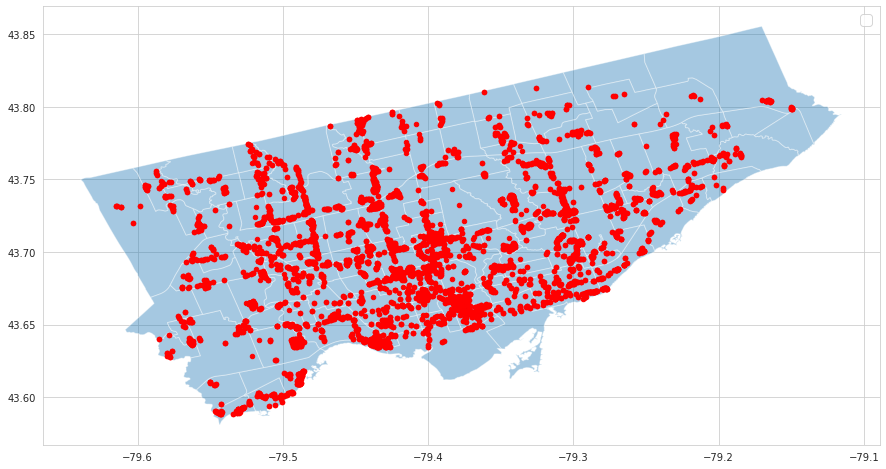

In [350]:
fig, ax = plt.subplots(figsize = (15, 15))
toronto_map.plot(ax = ax, alpha = 0.4)
geo_df[geo_df['SCORE'] > 1].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = '')
plt.legend(prop = {'size': 15})

In [313]:
import folium
from folium.plugins import HeatMap

In [314]:
# heatmap of buildings with score > 95

df_90 = df[df['SCORE'] > 95]

toronto_map = folium.Map(location=[np.mean(df_90['LATITUDE']), np.mean(df_90['LONGITUDE'])], 
                         zoom_start = 11, 
                         tiles='CartoDB positron'
) 

heatmap_data = list(map(list, zip(df_90['LATITUDE'], df_90['LONGITUDE'])))

HeatMap(heatmap_data).add_to(toronto_map)

toronto_map

In [315]:
# heatmap of buildings with score < 60

df_60 = df[df['SCORE'] < 50]

toronto_map = folium.Map(location=[np.mean(df_60['LATITUDE']), np.mean(df_60['LONGITUDE'])], 
                         zoom_start = 11, 
                         tiles='CartoDB positron'
) 

heatmap_data = list(map(list, zip(df_60['LATITUDE'], df_60['LONGITUDE'])))

HeatMap(heatmap_data).add_to(toronto_map)

toronto_map

In [316]:
# where government houses are built

df_gov = df[df['PROPERTY_TYPE'] == 2]

toronto_map = folium.Map(location=[np.mean(df_gov['LATITUDE']), np.mean(df_gov['LONGITUDE'])], 
                         zoom_start = 11, 
                         tiles='CartoDB positron'
) 

heatmap_data = list(map(list, zip(df_gov['LATITUDE'], df_gov['LONGITUDE'])))

HeatMap(heatmap_data).add_to(toronto_map)

toronto_map

In [323]:
# linear regression to check YEAR_BUILT VS SCORE and PROPERTY_TYPE VS SCORE

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = df['PROPERTY_TYPE']
y = df['SCORE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.697
Date:                Sun, 05 Sep 2021   Prob (F-statistic):             0.0302
Time:                        23:41:24   Log-Likelihood:                -29617.
No. Observations:                8078   AIC:                         5.924e+04
Df Residuals:                    8076   BIC:                         5.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            72.3456      0.114    634.768

/home/nat/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
